# Chronic Kidney Disease - SVM Classifier

**Author:** Jules Maurice Mulisa

**Glasgow Caledonian University

**Module:** Big Data


In [1]:
# Importing and Loading libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import rcParams
import seaborn as sb


In [2]:
#setting up the workspace options
# options for graphs
%matplotlib inline
rcParams['figure.figsize']= 5 , 4
sb.set_style('whitegrid')

# options for pandas to be abble to see all 25 columns
pd.options.display.max_columns = 30
# pd.options.display.max_rows = 160

# pd.options.display.max_columns

In [3]:
# dataset headers
columns = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class','nan']


In [4]:
# Loading data csv data
dataset = pd.read_csv('chronic_kidney_disease_data.csv',  warn_bad_lines=True)
# dataset

In [5]:
# checking the summary statistics on each attribute
# print dataset.describe()

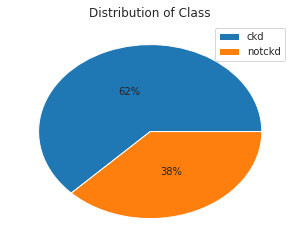

In [6]:
#different groups in classes 
dataset.groupby('class').count()
ckd = 250
notckd = 150

chart_labels = ['ckd', 'notckd']
data = [ckd, notckd]

plt.pie(data,autopct='%1.0f%%',pctdistance=0.5, labeldistance=1.1 )
plt.title('Distribution of Class')
plt.legend(chart_labels, loc='best')


In [7]:
# dataset headers
columns = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class']


In [8]:
# generating a dataframe
df = DataFrame(dataset)
df = df[columns]
df.shape


(400, 25)

### Handling Missing Values

In [9]:
# replacing the ? mark with NaN
df_nan = df.replace('?', np.NaN)

# count he nubmer of NaN values in each column
print df_nan.isnull().sum()
# df_nan

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       72
wbcc     108
rbcc     131
htn        5
dm         8
cad        4
appet      1
pe         1
ane        1
class      0
dtype: int64


### Droping NaN

In [10]:
# drop the remaining NaN values
df_clean = df_nan.dropna()
df_clean.shape

(155, 25)

In [11]:
# df_clean.isnull().sum()

<BarContainer object of 2 artists>

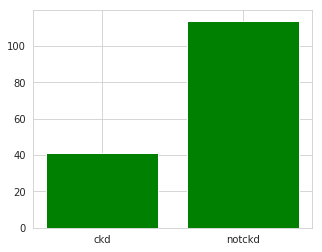

In [12]:
# class distribution in the clean dataset
x = ['ckd','notckd']
y = df_clean.groupby("class").size()
plt.bar(x, y, color='green')

### Data Encoding

In [13]:
# df_clean.head(10)

In [14]:
df_encoded = pd.get_dummies(df_clean, 
                            columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class'])
# df_encoded.head(3)

In [15]:
# making a df without double colomns for the decoded columns. because
# as you can see one column can contain all the data. it's either 1 or 0
df_simplified = df_encoded[['age','bp','sg','al','su','rbc_normal','pc_normal','pcc_present','ba_present','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc',
                            'htn_yes','dm_yes','cad_yes','appet_good','pe_yes','ane_yes','class_ckd']]

# giving the simplified dataframe original columns titles
df_simplified.columns = columns
# df_simplified.head(3)

In [16]:
# df_simplified.info()

#checking for duplicates
df_simplified.duplicated()

3      False
9      False
11     False
14     False
20     False
22     False
27     False
48     False
58     False
71     False
74     False
84     False
90     False
91     False
92     False
93     False
127    False
128    False
130    False
144    False
147    False
153    False
157    False
159    False
171    False
176    False
181    False
189    False
190    False
196    False
       ...  
367    False
368    False
370    False
371    False
372    False
373    False
374    False
375    False
376    False
377    False
379    False
380    False
382    False
383    False
384    False
385    False
386    False
387    False
388    False
389    False
390    False
391    False
392    False
393    False
394    False
395    False
396    False
397    False
398    False
399    False
Length: 155, dtype: bool

In [17]:
# The data had to change the type
df_floated = df_simplified.astype(np.float)
# df_floated.head(3)

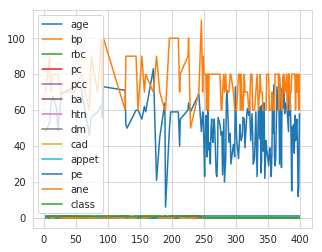

In [18]:
df_toVisualize = df_simplified[['age','bp','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']]
df_toVisualize = df_toVisualize.astype(float)

df_toVisualize.plot()
# df_toVisualize.info()

In [19]:
df_toVisualize['rbc'].value_counts()


1.0    138
0.0     17
Name: rbc, dtype: int64

## Outliers Detection

### Outliers in Blood glucose

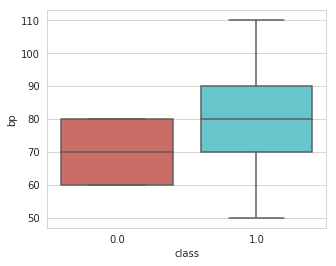

In [20]:
sb.boxplot(x='class', y='bp', data=df_floated, palette='hls')
# remove the ones above 450

In [38]:
df_outliers = df_simplified [['age','bp']]
data = df_outliers.iloc[:, 0:1].values
target = df_outliers.iloc[:,1].values
# df_toVisualize[:10]
# sb.boxplot(x='bp', y='age', data=df_toVisualize, palette='hls')
# plt.plot

### Outliers in blood Pressure

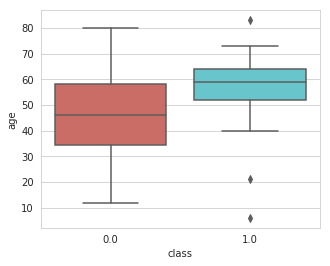

In [22]:
df_no_outlier = df_toVisualize[df_toVisualize['bp'] < 120]
sb.boxplot(x='class', y='age', data=df_floated, palette='hls')


### Data distrution among classes

### Data Correrations

In [23]:
df_pairplot = df_toVisualize.iloc[:,:-1]
df_target = df_toVisualize['class']
target_names = ['cdk','notckd']

# df_pairplot['group'] = pd.Series(df_target, dtype='category')
# sb.pairplot(df_pairplot, hue='group', palette='hls')

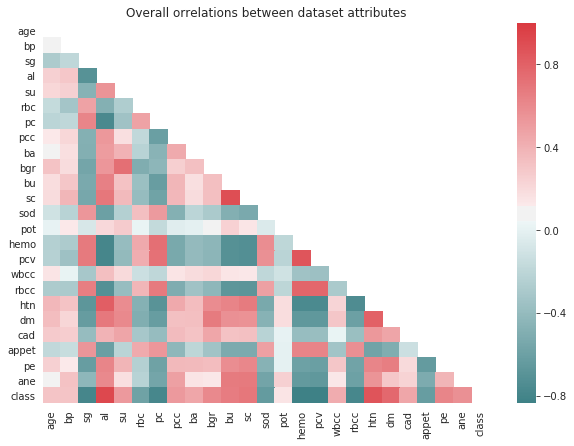

In [24]:
# define the correration dataframe
df_correlation = df_floated.corr()

# styling the colors for the heatmap
custom_cmap = sb.diverging_palette(200, 11, as_cmap=True)

# making the mast for the heatmap
heat_mask = np.zeros_like(df_correlation, dtype=np.bool)
heat_mask[np.triu_indices_from(heat_mask)] = True


# setting the plot size

f, ax = plt.subplots(figsize=(10, 7))

# here we should let the matplotlib decide the vmax and vmin which is more accurate
sb.heatmap(df_correlation, cmap=custom_cmap, mask=heat_mask)
plt.title('Overall orrelations between dataset attributes')
plt.show()


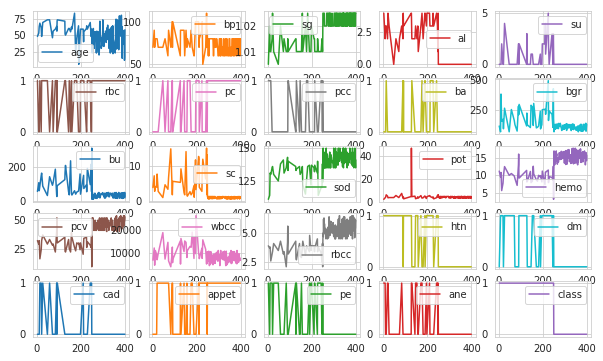

In [25]:
# plot the respective box and whisker diagrams
rcParams['figure.figsize']=  10, 6

df_floated.plot(kind='line', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

In [26]:
df_final = df_floated
# df_final

ckd	: 114
notckd : 41
Proportion: 2.0 : 1


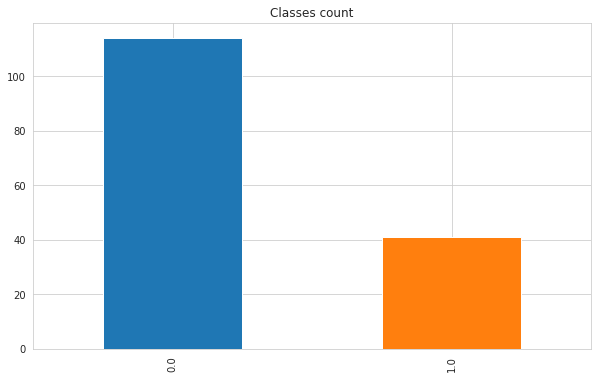

In [27]:
class_count = df_final['class'].value_counts()
print'ckd\t:', class_count[0]
print'notckd :', class_count[1]
print'Proportion:', round(class_count[0] /
                          class_count[1], 2), ': 1'

class_count.plot(kind='bar', title='Classes count');

In [28]:
# counting classes 
notckd_count, ckd_count = df_final['class'].value_counts()

# Distribute dataframe to classes 
df_notckd = df_final[df_final['class'] == 0]
df_ckd = df_final[df_final['class'] == 1]

In [29]:
ckd_count

41

Over-sampling...
1.0    114
0.0    114
Name: class, dtype: int64
Proportion: 1.0 : 1


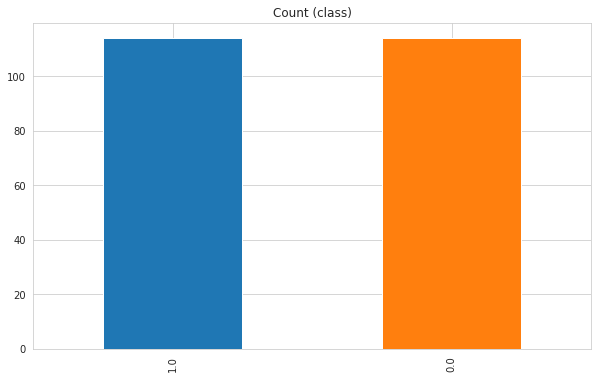

In [30]:
# resampling ckd class
df_ckd_oversampled = df_ckd.sample(notckd_count, replace=True)
df_final_resampled = pd.concat([df_notckd, df_ckd_oversampled], axis=0)
classes_count = df_final_resampled['class'].value_counts()

# printing resampled classes
print 'Over-sampling...'
print classes_count 
print 'Proportion:', round(classes_count[0] / classes_count[1], 2), ': 1'

# ploting resampled dataframe
df_final_resampled['class'].value_counts().plot(kind='bar', title='Count (class)');

In [31]:
# df_test_over

## Training and Testing Data Separation

In [32]:
# inputs
X = df_final_resampled.iloc[:,:-1].values
# outputs
y = df_final_resampled['class'].values


In [33]:
#importing sklearn library 
from sklearn.model_selection import train_test_split  
validation_size = 0.20
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = validation_size,  random_state=seed)  
X_train.shape

(182, 24)

In [34]:
X_test.shape

(46, 24)

### Model Construction

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#  parameters selection
params = [{'kernel': ['sigmoid'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'],'gamma': [1e-3, 1e-4],'C': [1,10,100,1000], 'degree' : [3,5]}]

clf = GridSearchCV(SVC(), params, cv=5, scoring='accuracy')

# Building the module
clf.fit(X_train, y_train)

# setting the prediction data
predict_y= clf.predict(X_test)




### Model Testing 

In [36]:
# counting correct results
test_results = sum(int(i == z) for i, z in zip(predict_y, y_test))
print "Checking algorithm results"
print "Total score: %s / %s Got right" % (test_results, len(y_test))

# printing prediction results/scrores
print 'Best parameters: ',clf.best_params_
print 'Accuracy: ', accuracy_score(y_test, predict_y)
print 'Confusion Matric:\n',confusion_matrix(y_test, predict_y)
print 'Report: \n', classification_report(y_test, predict_y)


Checking algorithm results
Total score: 45 / 46 Got right
Best parameters:  {'kernel': 'rbf', 'C': 1, 'gamma': 0.001, 'degree': 3}
Accuracy:  0.9782608695652174
Confusion Matric:
[[20  0]
 [ 1 25]]
Report: 
             precision    recall  f1-score   support

        0.0       0.95      1.00      0.98        20
        1.0       1.00      0.96      0.98        26

avg / total       0.98      0.98      0.98        46

